# Notebook: Preprocessing and Interpolation of Well Log and Lab Data
 
**Description:** Workflow to preprocess and interpolate lab and well log data for machine learning and geophysical modeling applications.

---

## Table of Contents

1. [Introduction](#1-introduction)  
2. [Setup](#2-setup)  
3. [Step 1: Split Merged Data](#3-step-1-split-merged-data)  
4. [Step 2: Clean Column Names](#4-step-2-clean-column-names)  
5. [Step 3: Interpolate Missing Values](#5-step-3-interpolate-missing-values)  
6. [Step 4: Visualize Interpolation Results](#6-step-4-visualize-interpolation-results)  
7. [Step 5: Analyze Missing Values](#7-step-5-analyze-missing-values)  
8. [Step 6: Analyze Distributions and Correlations](#8-step-6-analyze-distributions-and-correlations)  
9. [Step 7: Save Processed Data](#9-step-7-save-processed-data)

---

## 1. Introduction

This notebook focuses on preprocessing and interpolating well log data to address missing values and ensure data quality. The workflow includes:

1. Splitting merged data into separate datasets for well log data.  
2. Cleaning column names to make them consistent.  
3. Interpolating missing values in selected columns.  
4. Visualizing the results of the interpolation to validate the process.  
5. Analyzing and visualizing the missing value patterns.  
6. Analyzing distributions and correlations between interpolated parameters.  
7. Saving the processed dataset for further modeling and analysis.

---

## 2. Setup

Import necessary libraries and modules.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sys
sys.path.append("../.")

from geothermal_prediction.well_interpolation import perform_interpolation
from geothermal_prediction.visualization import visualize_missing_values, plot_properties_by_well
from geothermal_prediction.utils import save_to_csv

---

## 3. Step 1: Split Merged Data

Separate the merged dataset into two: one for lab data and another for well log data.

In [2]:
# Load merged data
merged_data = pd.read_csv('../data/processed/final_merged_data.csv')

# Columns for lab and log data
lab_columns = ['Density_lab', 'Porosity_lab', 'Vp_lab', 'Vs_lab', 'Acoustic_Imp_lab', 'Th_Cond_lab', 'Th_Diff_lab']
log_columns = ['Gamma_Ray_log', 'Bulk_Density_log', 'Porosity_log', 'Sonic_Log_log', 'Th_Cond_lab', 'Th_Diff_lab']

# Split datasets
lab_data = merged_data[['Well_ID', 'Depth'] + lab_columns].copy()
log_data = merged_data[['Well_ID', 'Depth'] + log_columns].copy()

print(f"Lab data shape: {lab_data.shape}")
print(f"Log data shape: {log_data.shape}")

Lab data shape: (142024, 9)
Log data shape: (142024, 8)


---

## 4. Step 2: Clean Column Names

Remove `_lab` and `_log` suffixes from column names for clarity.

In [3]:
# Rename columns
lab_data.rename(columns=lambda x: x.replace('_lab', ''), inplace=True)

log_data.rename(columns=lambda x: x.replace('_log', '').replace('_lab', ''), inplace=True)


---

## 5. Step 3: Interpolate Missing Values

Use interpolation to handle missing values in the lab and log data.

### Lab Data Interpolation

In [4]:
# Define columns to interpolate for lab data
lab_interpolate_columns = ['Density', 'Porosity', 'Vp', 'Vs', 'Acoustic_Imp', 'Th_Cond', 'Th_Diff']

# Perform interpolation
lab_data_interpolated = perform_interpolation(
    wells=lab_data,
    cols_to_interpolate=lab_interpolate_columns,
    threshold=20,  # Threshold for large missing intervals
    depth_name='Depth',
    well_name='Well_ID'
)

lab_order_columns = ['Well_ID', 'Depth', 
                     'Density', 'Density_interpolated',
                     'Porosity', 'Porosity_interpolated',
                     'Vp', 'Vp_interpolated',
                     'Vs', 'Vs_interpolated',
                     'Acoustic_Imp', 'Acoustic_Imp_interpolated',
                     'Th_Cond', 'Th_Cond_interpolated',
                     'Th_Diff', 'Th_Diff_interpolated'
                     ]

lab_data_interpolated = lab_data_interpolated.reindex(columns=lab_order_columns)

### Log Data Interpolation

In [5]:
# Define columns to interpolate for log data
log_interpolate_columns = ['Gamma_Ray', 'Bulk_Density', 'Porosity', 'Sonic_Log', 'Th_Cond', 'Th_Diff']

# Perform interpolation for log data
log_data_interpolated = perform_interpolation(
    wells=log_data,
    cols_to_interpolate=log_interpolate_columns,
    threshold=20,  # Threshold for large missing intervals
    depth_name='Depth',
    well_name='Well_ID'
)

log_order_columns = ['Well_ID', 'Depth', 
                     'Gamma_Ray', 'Gamma_Ray_interpolated',
                     'Bulk_Density', 'Bulk_Density_interpolated',
                     'Porosity', 'Porosity_interpolated',
                     'Sonic_Log', 'Sonic_Log_interpolated', 
                     'Th_Cond', 'Th_Cond_interpolated',
                     'Th_Diff', 'Th_Diff_interpolated'
                     ]

log_data_interpolated = log_data_interpolated.reindex(columns=log_order_columns)

---

## 6. Step 4: Visualize Interpolation Results

Visualize interpolated properties to validate the results.

Log Data - Well ID: E18-05


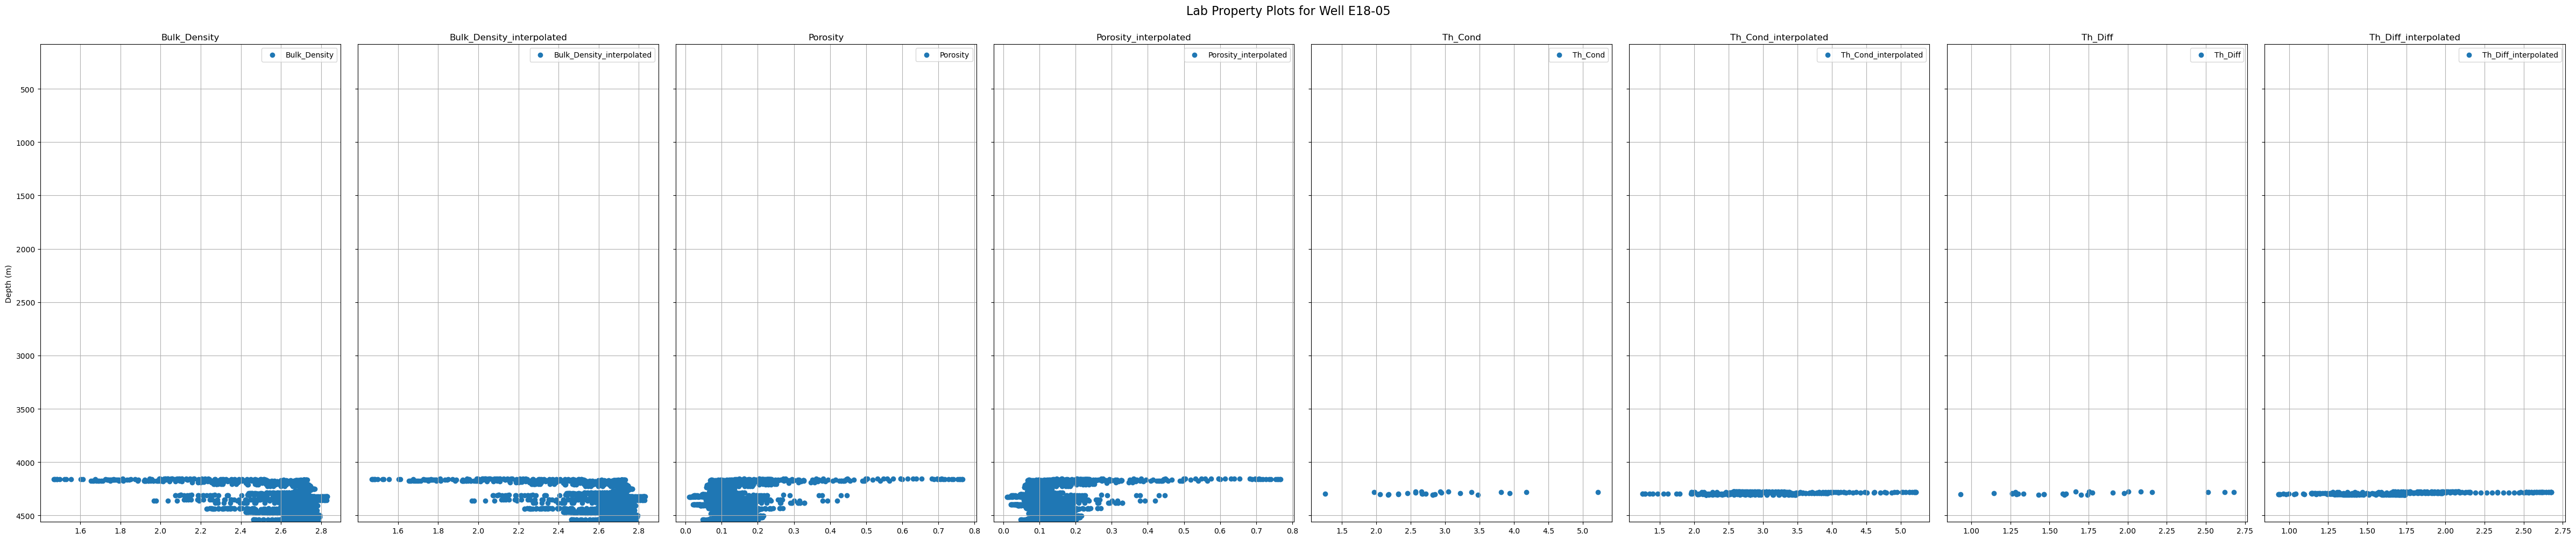

Log Data - Well ID: K18-07x


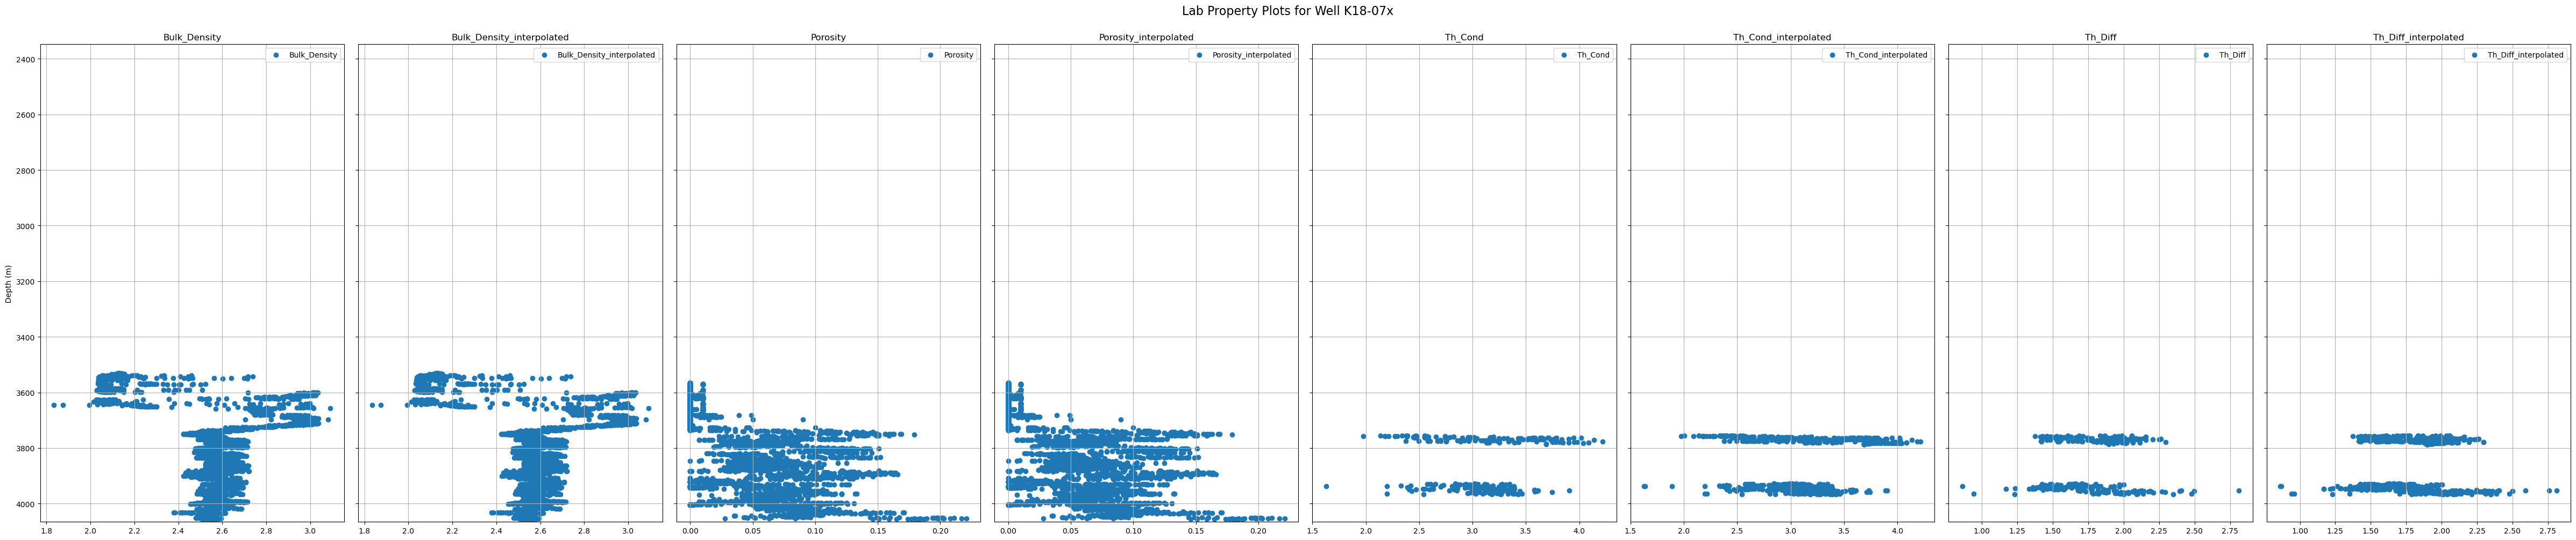

Log Data - Well ID: K18-08


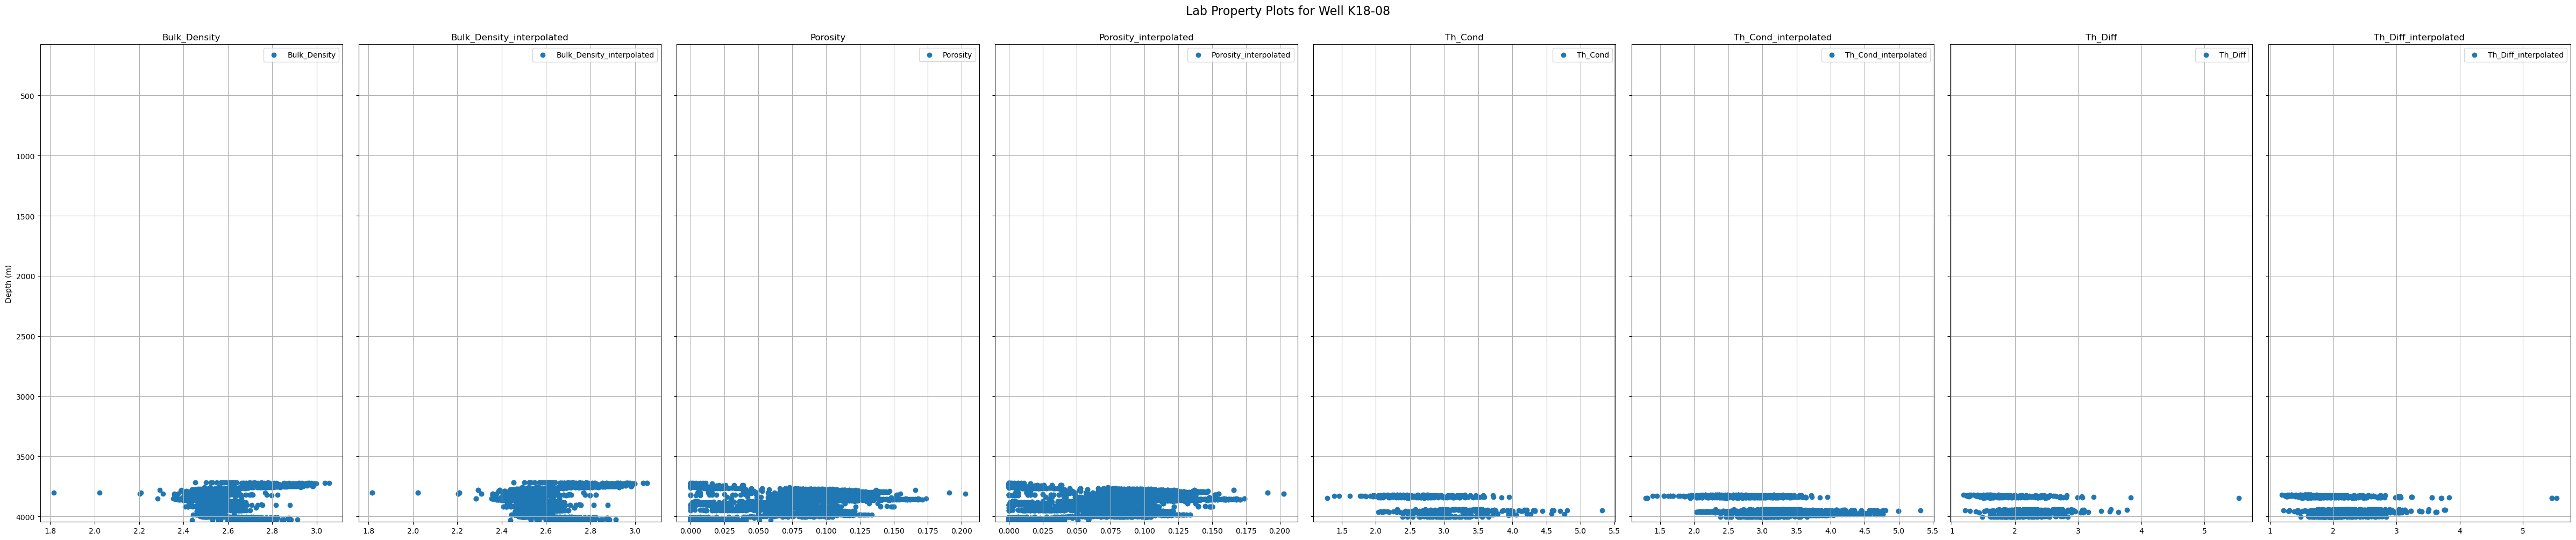

Log Data - Well ID: ZRP-03a


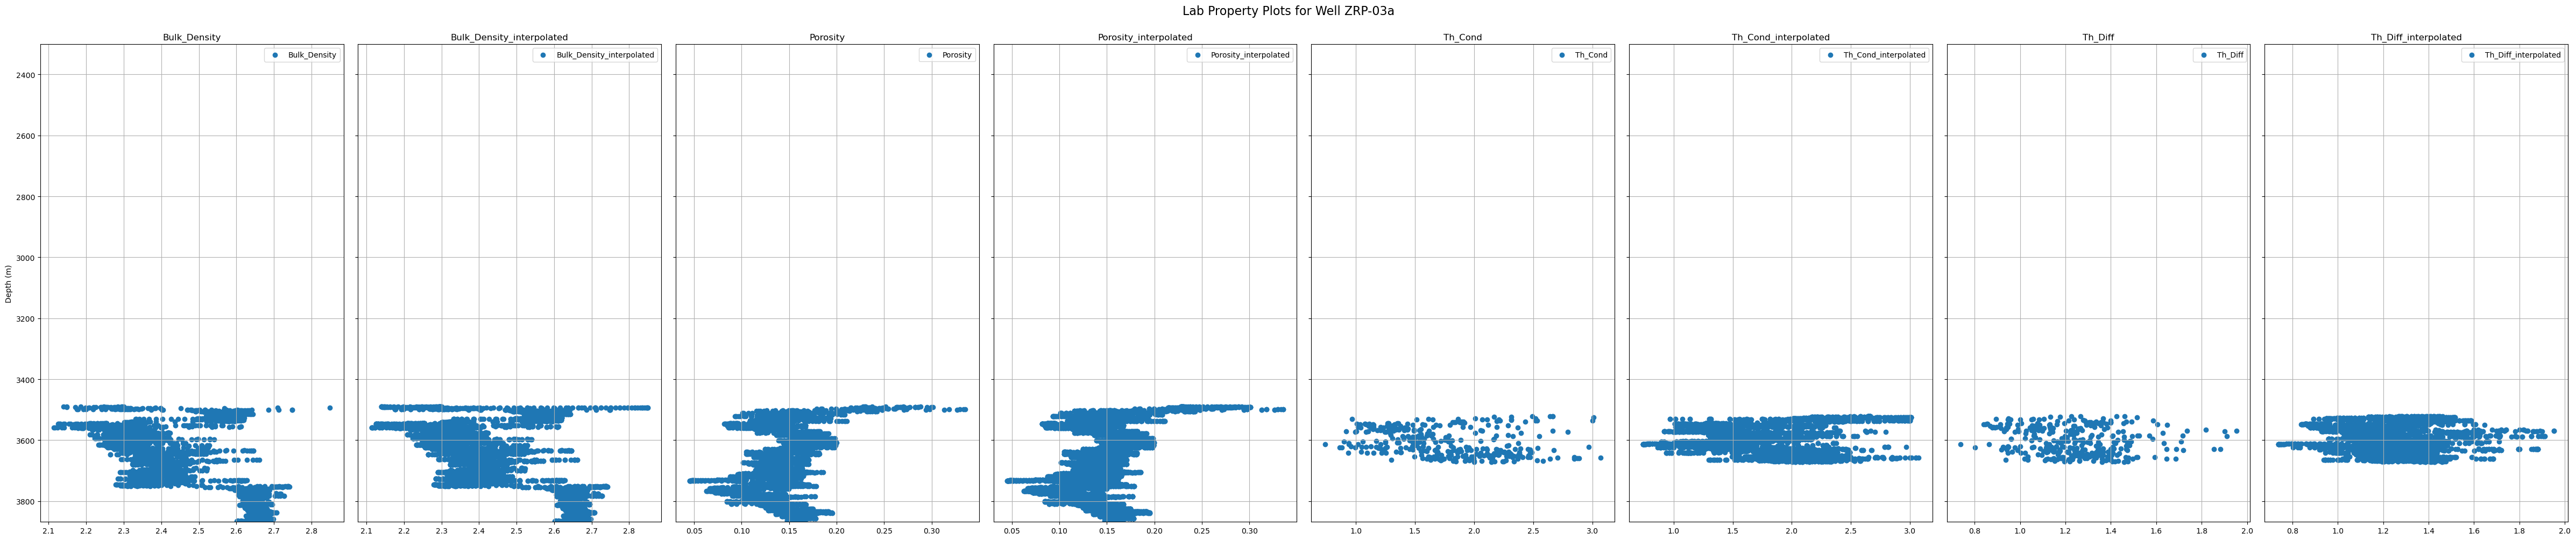

In [6]:
# Plot Original and Interpolated Data
cols_to_plot = ['Bulk_Density', 'Bulk_Density_interpolated', 'Porosity', 'Porosity_interpolated', 'Th_Cond', 'Th_Cond_interpolated', 'Th_Diff', 'Th_Diff_interpolated']
for well_id in log_data_interpolated['Well_ID'].unique():
    print(f"Log Data - Well ID: {well_id}")
    plot_properties_by_well(log_data_interpolated, well_id, cols_to_plot)

## 7. Step 5: Analyze Missing Values

Analyze the missing values in the interpolated dataset.


Log Data - Missing Values:


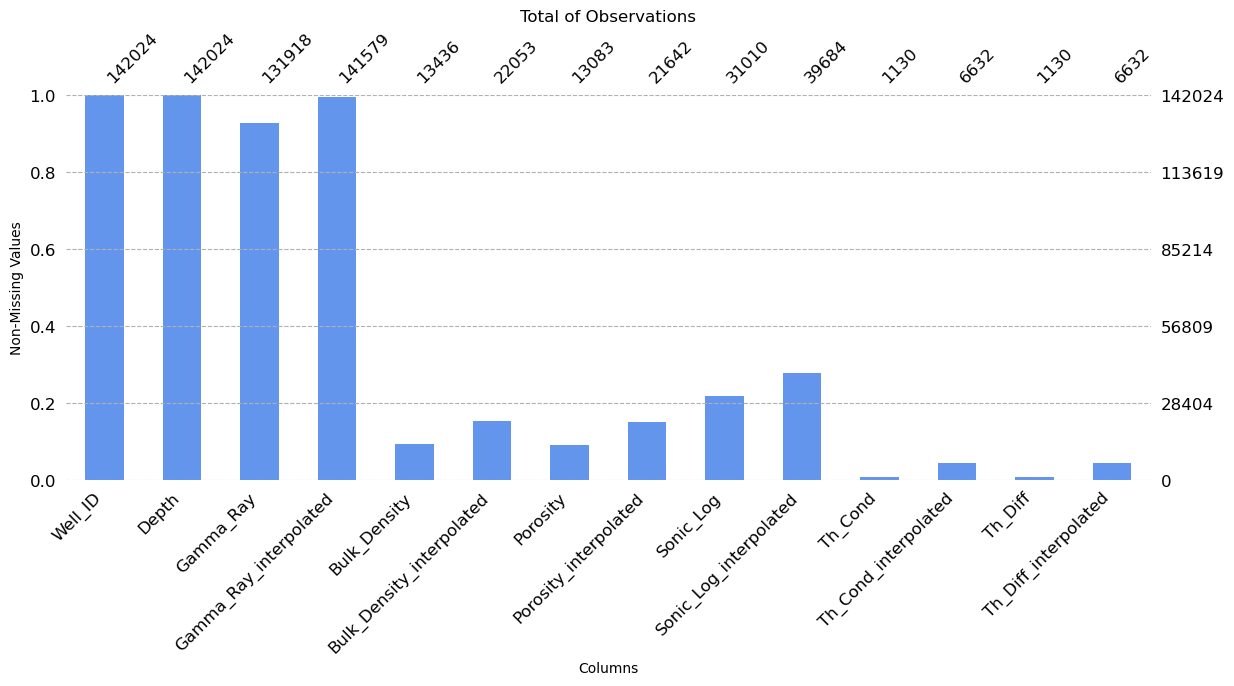

Missing values:
Well_ID                           0
Depth                             0
Gamma_Ray                     10106
Gamma_Ray_interpolated          445
Bulk_Density                 128588
Bulk_Density_interpolated    119971
Porosity                     128941
Porosity_interpolated        120382
Sonic_Log                    111014
Sonic_Log_interpolated       102340
Th_Cond                      140894
Th_Cond_interpolated         135392
Th_Diff                      140894
Th_Diff_interpolated         135392
dtype: int64


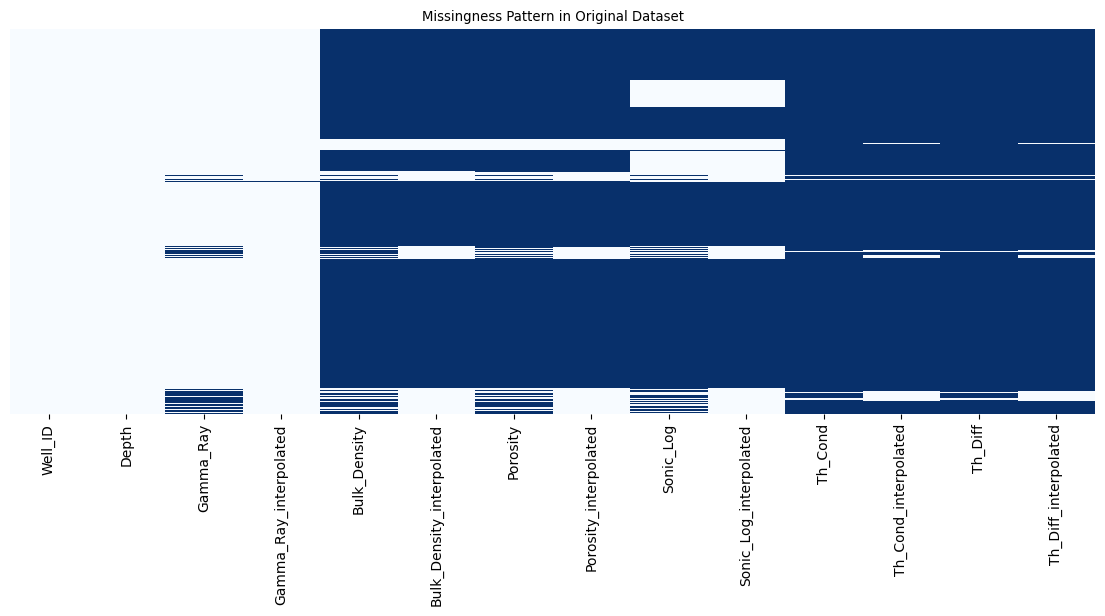

In [7]:
# Visualize missing values for log data
print("Log Data - Missing Values:")
visualize_missing_values(log_data_interpolated)

---

## 8. Step 6: Analyze Distributions and Correlations

To better understand the relationships and potential dependencies between different well log parameters, visualize:

1. Pairwise distributions of the interpolated parameters using `sns.pairplot`.
2. Correlation heatmap to evaluate the strength of relationships between these parameters.

This step helps identify potential multicollinearity and the overall behavior of the parameters, which can guide feature engineering and model development.

<Figure size 600x400 with 0 Axes>

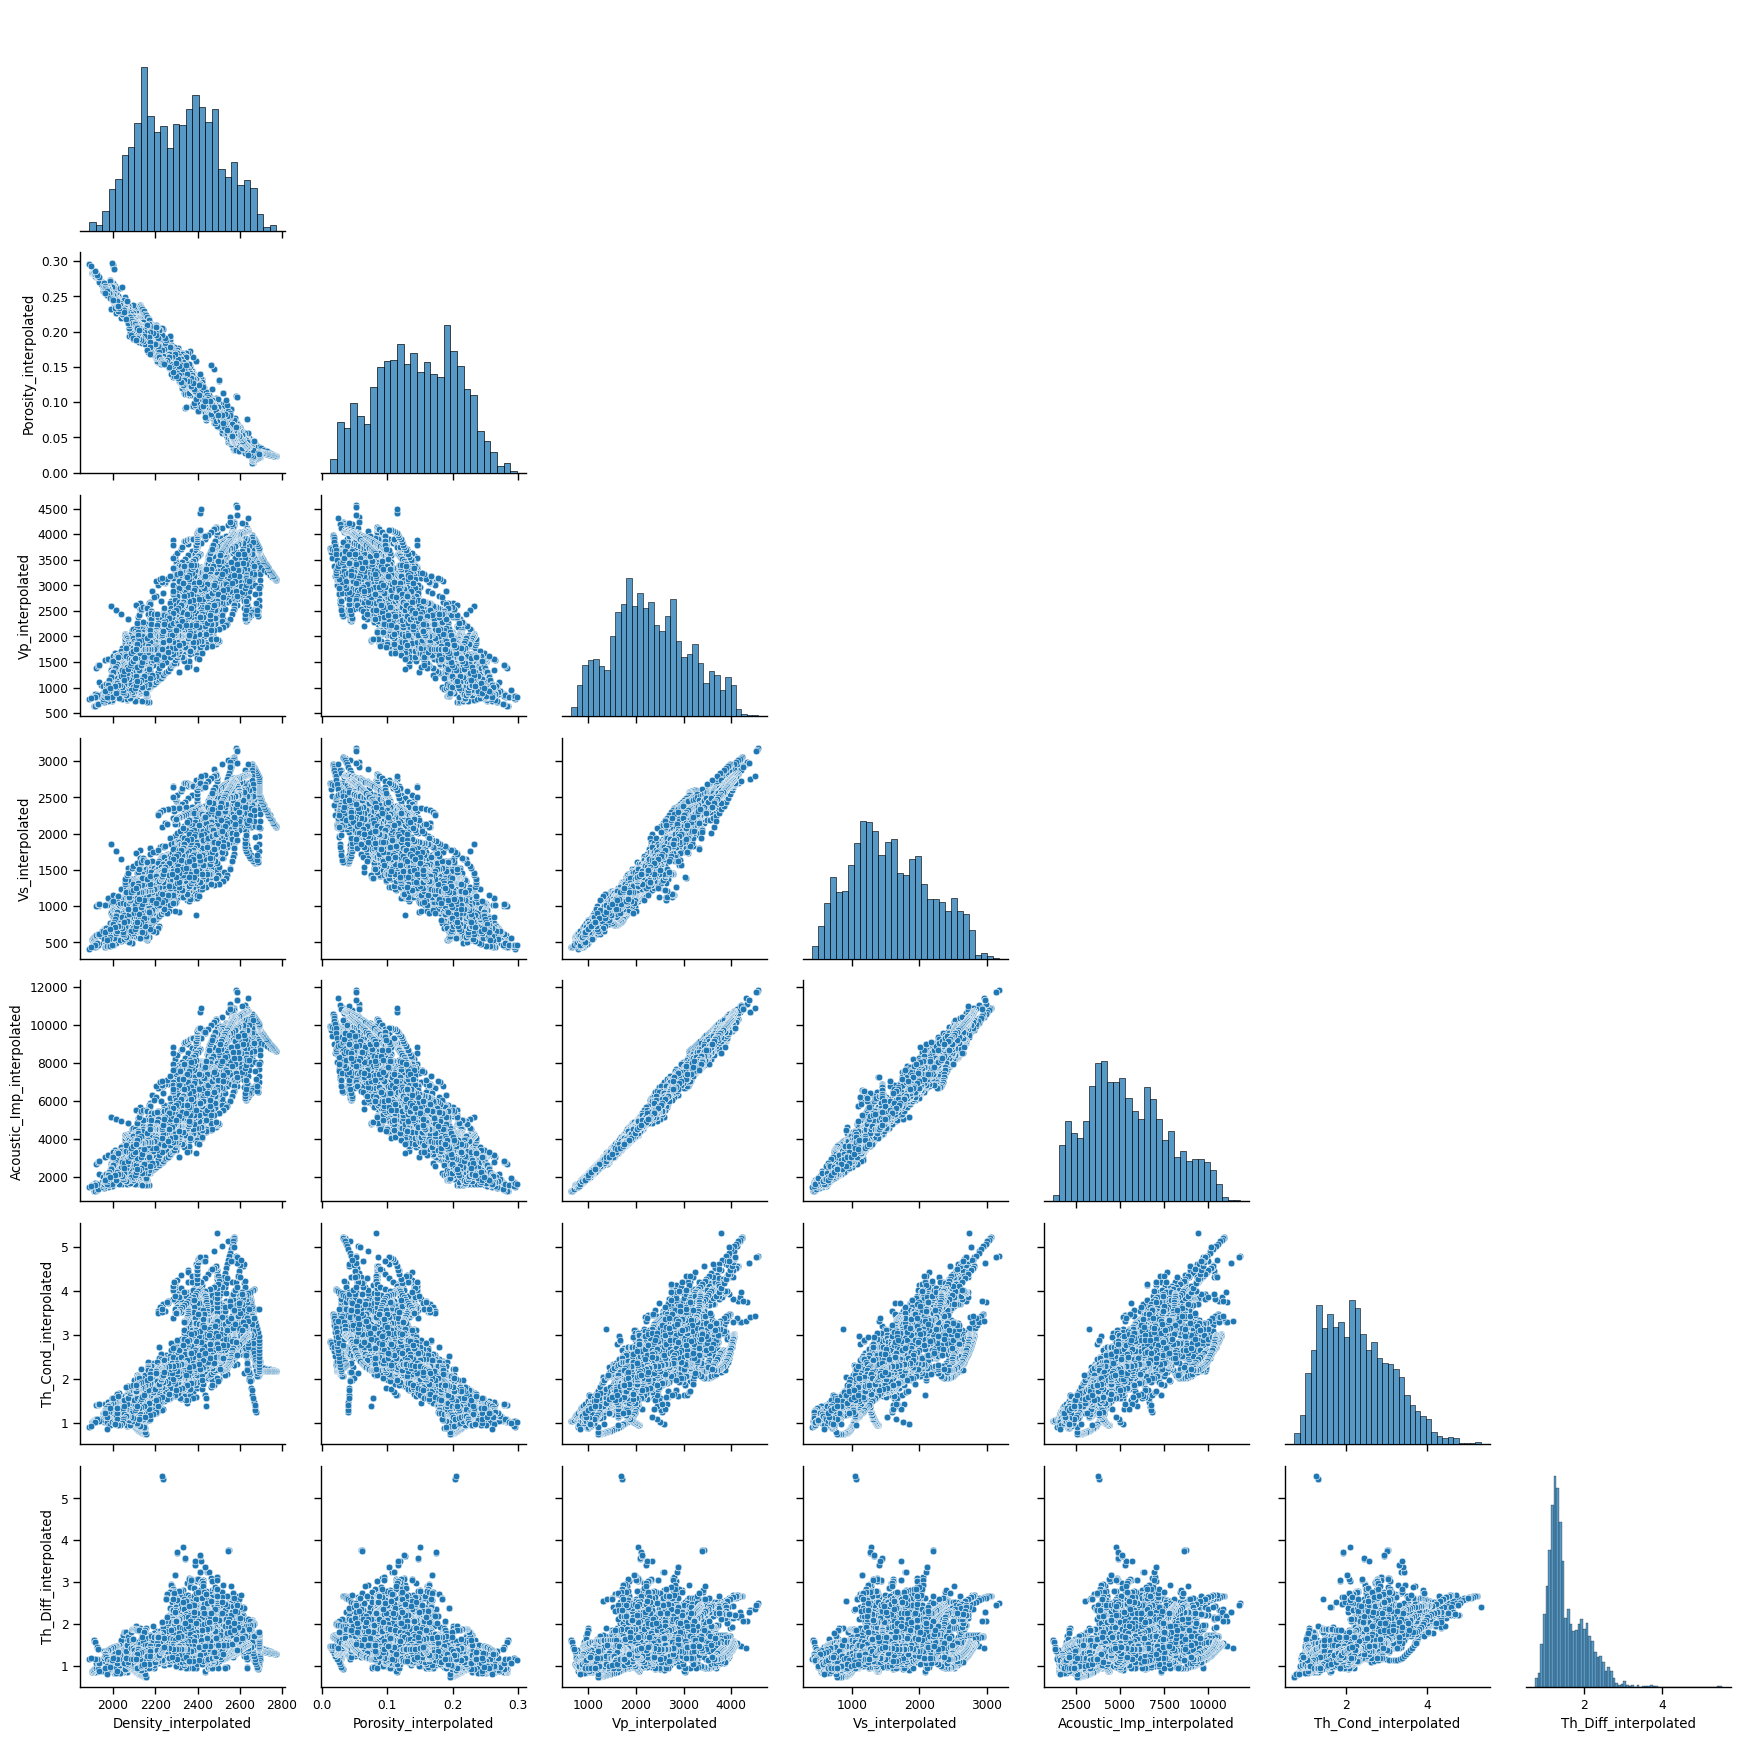

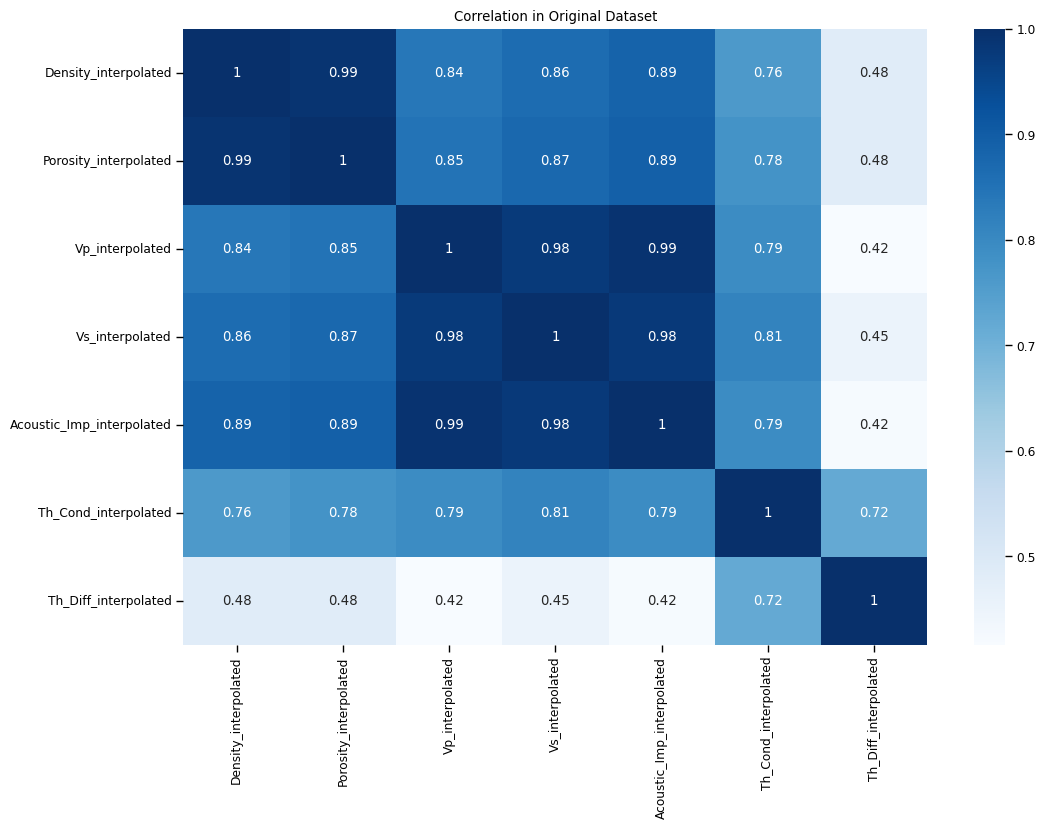

In [8]:
# Visualize the distributions of well log parameters and their correlations
col_corr = ['Density_interpolated', 'Porosity_interpolated', 'Vp_interpolated', 'Vs_interpolated', 'Acoustic_Imp_interpolated',
            'Th_Cond_interpolated', 'Th_Diff_interpolated'
            ]


fig = plt.figure(figsize=(6, 4))
sns.set_context('paper')
sns.pairplot(lab_data_interpolated[col_corr], corner=True)
plt.tight_layout()
plt.show()

wells_corr = lab_data_interpolated[col_corr].corr().abs()
fig, ax = plt.subplots(figsize=(12, 8))
sns.set_context('paper')
heatmap = sns.heatmap(wells_corr, cmap='Blues', annot=True)
plt.title('Correlation in Original Dataset')
plt.yticks(rotation=0)
plt.show()

<Figure size 600x400 with 0 Axes>

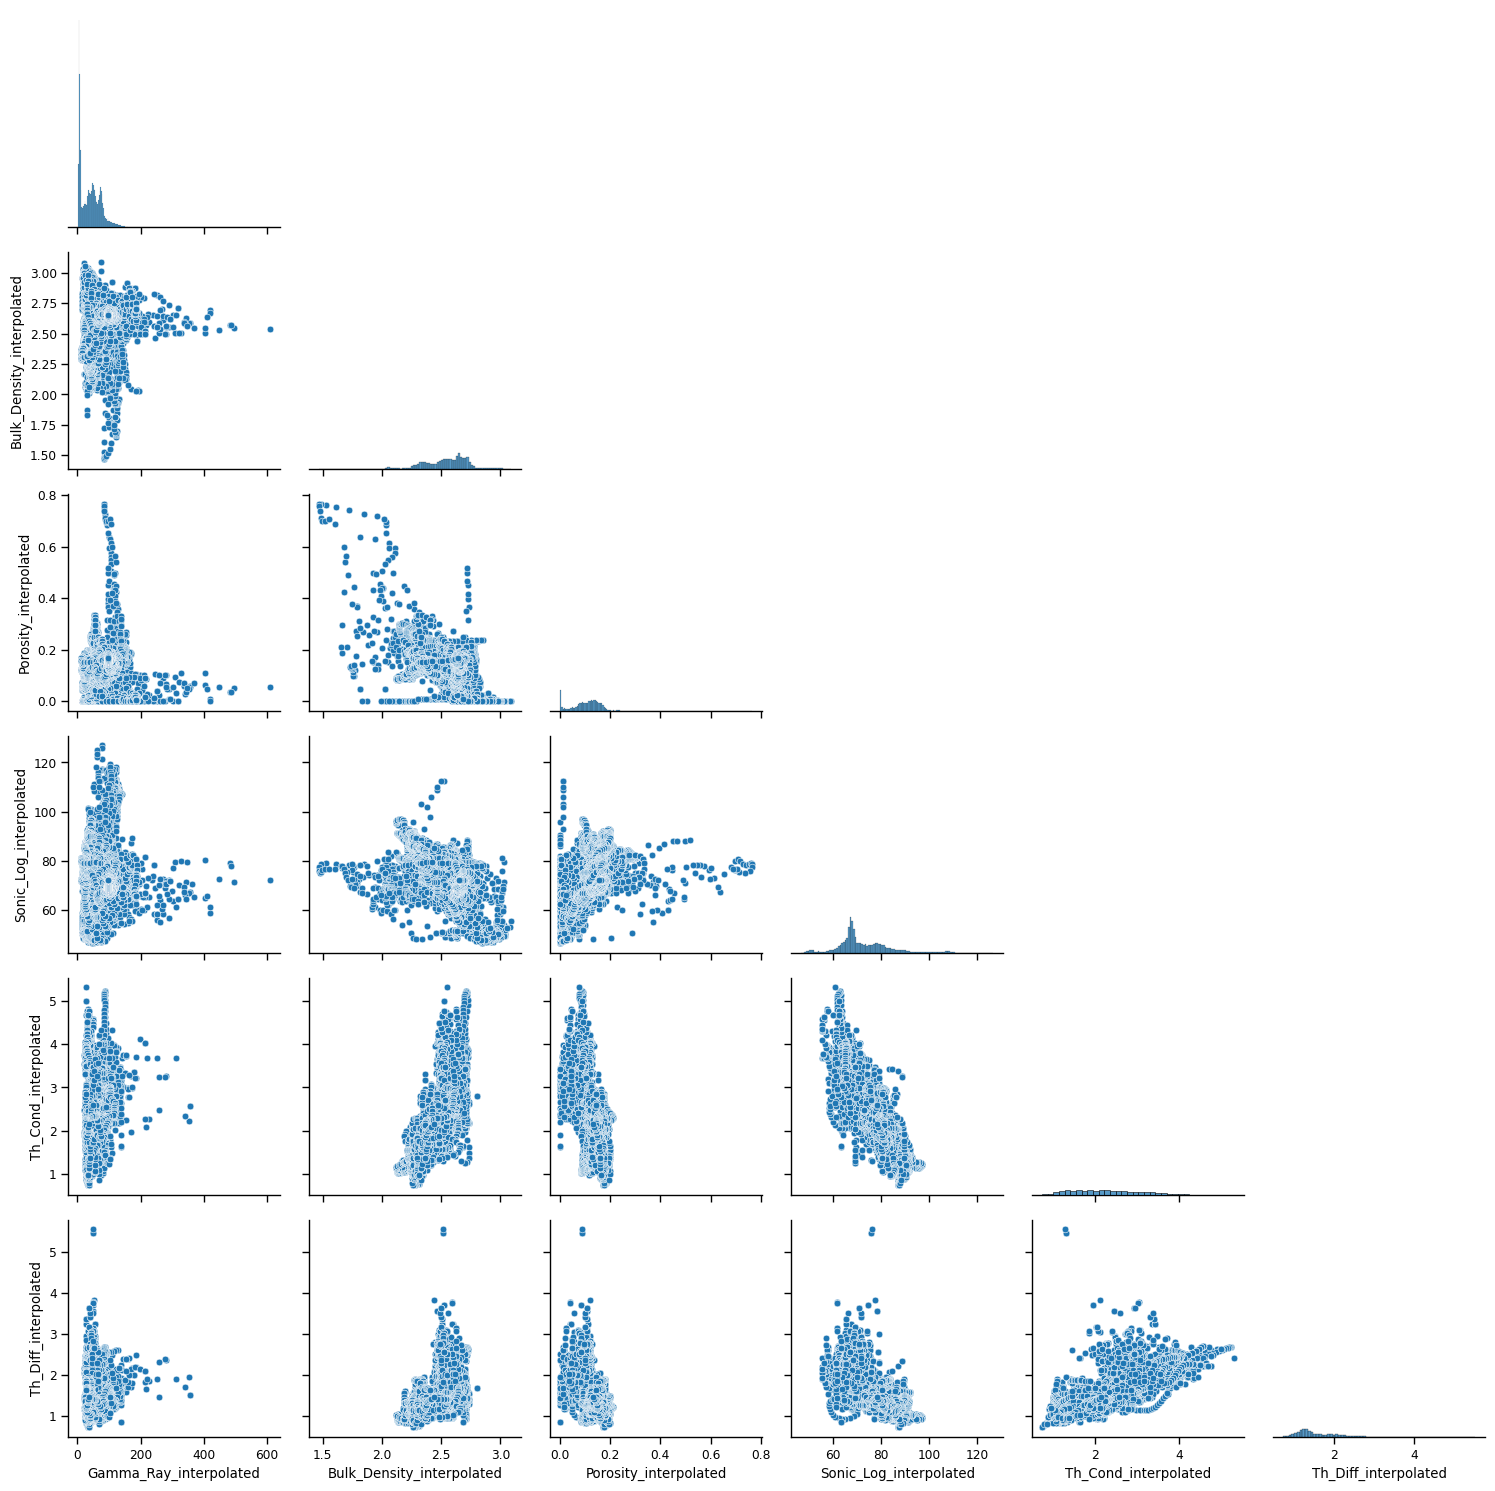

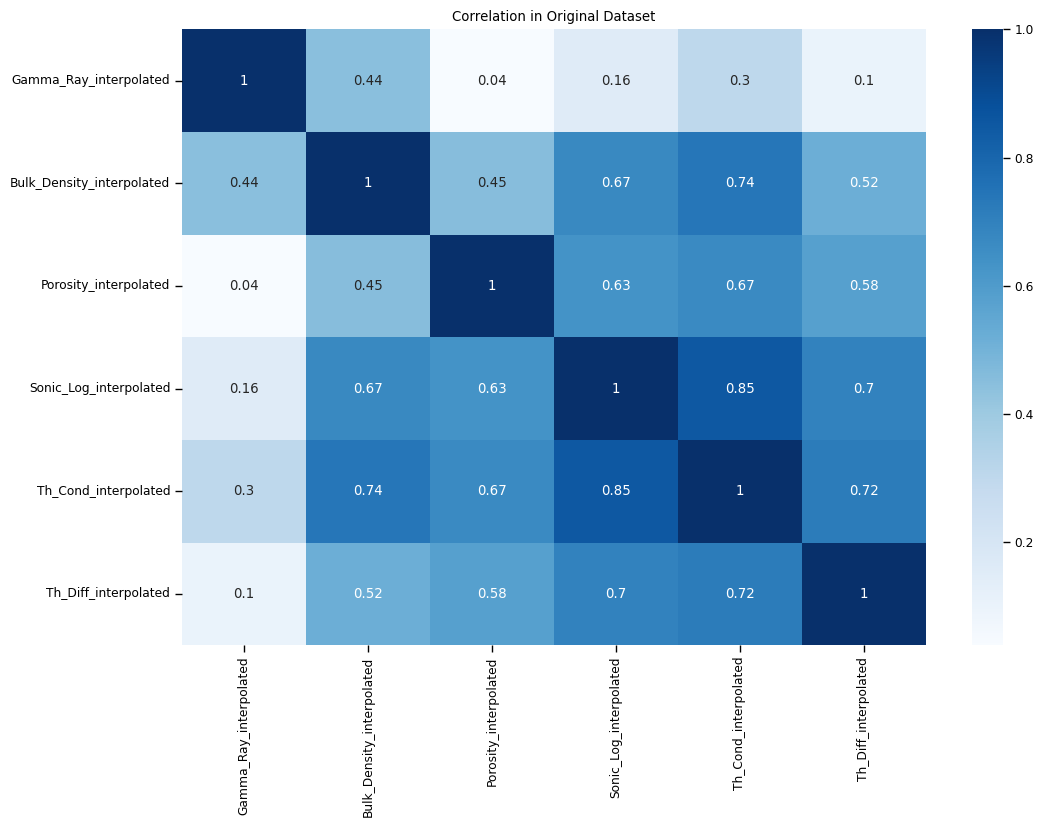

In [9]:
# Visualize the distributions of well log parameters and their correlations
col_corr = ['Gamma_Ray_interpolated', 'Bulk_Density_interpolated', 'Porosity_interpolated', 'Sonic_Log_interpolated', 
            'Th_Cond_interpolated', 'Th_Diff_interpolated'
            ]

fig = plt.figure(figsize=(6, 4))
sns.set_context('paper')
sns.pairplot(log_data_interpolated[col_corr], corner=True)
plt.tight_layout()
plt.show()

wells_corr = log_data_interpolated[col_corr].corr().abs()
fig, ax = plt.subplots(figsize=(12, 8))
sns.set_context('paper')
heatmap = sns.heatmap(wells_corr, cmap='Blues', annot=True)
plt.title('Correlation in Original Dataset')
plt.yticks(rotation=0)
plt.show()

---

## 9. Step 7: Save Processed Data

Save the processed and interpolated dataset for further analysis and modeling.

In [10]:
# Save log data
save_to_csv(lab_data_interpolated, 'lab_data_ml', folder='data/processed/')

File saved successfully


In [11]:
# Save log data
save_to_csv(log_data_interpolated, 'log_data_ml', folder='data/processed/')

File saved successfully
